In [7]:
import nengo
import nengolib
from nengo.utils.matplotlib import rasterplot

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from nengo_learn_assoc_mem.learning_rules.neg_voja import NegVoja

In [8]:
def cycle_array(x, period, dt=0.001):
    """Cycles through the elements"""
    i_every = int(round(period / dt))
    if i_every != period / dt:
        raise ValueError("dt (%s) does not divide period (%s)" % (dt, period))

    def f(t):
        i = int(round((t - dt) / dt))  # t starts at dt
        return x[int(i / i_every) % len(x)]

    return f

In [9]:
dims = 2
n_neurons = 20
seed = 2
intercepts = [0.8]*n_neurons

rad_comp = 1/np.sqrt(2)

In [10]:
with nengolib.Network(seed=seed) as model:
    ens = nengo.Ensemble(n_neurons, dims, intercepts=intercepts, seed=seed)

with nengo.Simulator(model) as sim:
    pass

enc = sim.data[ens].encoders

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

In [7]:
with nengolib.Network(seed=seed) as model:
    in_nd = nengo.Node(cycle_array([[-rad_comp, -rad_comp], [rad_comp, rad_comp]], 0.1))
    cor_nd = nengo.Node(cycle_array([[-rad_comp, rad_comp], [rad_comp, -rad_comp]], 0.1))
    out_nd = nengo.Node(size_in=2)

    ens = nengo.Ensemble(n_neurons, 2, intercepts=intercepts, seed=seed)
    
    nengo.Connection(in_nd, ens, synapse=None)
    nengo.Connection(ens, out_nd, learning_rule_type=nengo.PES())
    
    # Error flow node
    pes_learn_control = nengo.Node(
        lambda t, x: x[:-1] if x[-1] >= 0 else x[:-1] * 0,
        size_in=dimensions + 1)
    nengo.Connection(pes_learn_control,
                     conn_out.learning_rule)

    # Error calculation connections
    nengo.Connection(out_nd, pes_learn_control[:-1],
                     synapse=None)
    nengo.Connection(cor_nd, pes_learn_control[:-1],
                     transform=-1, synapse=None)
    # Control connection
    nengo.Connection(learning, pes_learn_control[-1],
                     synapse=None)

    


    p_in = nengo.Probe(in_nd)
    p_cor = nengo.Probe(cor_nd)
    p_out = nengo.Probe(out_nd)

with nengo.Simulator(model) as sim:
    sim.run(1)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

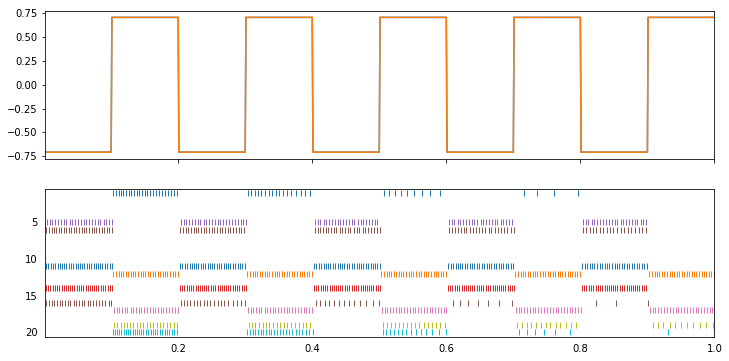

In [8]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12, 6))
ax1.plot(sim.trange(), sim.data[p_in])
rasterplot(sim.trange(), sim.data[p_spikes], ax=ax2)

In [10]:
x_val = np.linspace(0, 2*np.pi, 50)
circ = np.array([np.cos(x_val), np.sin(x_val)]).T

enc_h = neg_voja.encoder_hist

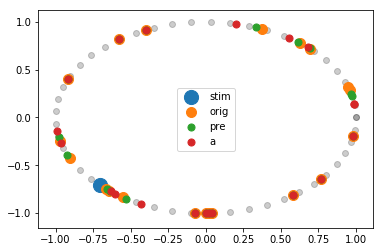

In [12]:
win_pre = 2
win_a = -1

plt.scatter(circ[:, 0], circ[:, 1], color='k', alpha=0.2)
plt.scatter(sim.data[p_in][win_pre][0], sim.data[p_in][win_pre][1], label="stim", s=200)

plt.scatter(enc_h[0][:, 0], enc_h[0][:, 1], label="orig", s=100)
plt.scatter(enc_h[win_pre][:, 0], enc_h[win_pre][:, 1], label="pre", s=50)
plt.scatter(enc_h[win_a][:, 0], enc_h[win_a][:, 1], label="a", s=50)

plt.legend()
# plt.xlim(-1.1, 1.1)
# plt.ylim(-1.1, 1.1)